# Movie_Genre_Classification

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

### Import necessary files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

### Load Train Dataset

In [2]:
train_path = ('train_data.txt')
train_data = pd.read_csv(train_path, sep = ':::', names = ['Title', 'Genre', 'Description'])
train_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_248\3577738416.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv(train_path, sep = ':::', names = ['Title', 'Genre', 'Description'])


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


### Load Test Dataset

In [3]:
test_path = ('test_data.txt')
test_data = pd.read_csv(test_path, sep = ':::', names = ['id', 'Title', 'Description'])
test_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_248\1071487059.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv(test_path, sep = ':::', names = ['id', 'Title', 'Description'])


,id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


### Load Target Dataset

In [4]:
test_soln_path = ('test_data_solution.txt')
test_soln_data = pd.read_csv(test_soln_path, sep = ':::', names = ['Title', 'Genre', 'Description'])
test_soln_data.drop(test_soln_data.columns[[0,2]], axis = 1, inplace = True)
test_soln_data.rename(columns = {'Genre':'Target_Genre'}, inplace = True)
test_soln_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_248\3277382499.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_soln_data = pd.read_csv(test_soln_path, sep = ':::', names = ['Title', 'Genre', 'Description'])


,Target_Genre
1,thriller
2,comedy
3,documentary
4,drama
5,drama


In [5]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
test_data.describe()

,id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [10]:
counts = train_data.Genre.value_counts()
counts

Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

#### Ploting the counts of Genres in the training dataset

<Axes: xlabel='count', ylabel='Genre'>

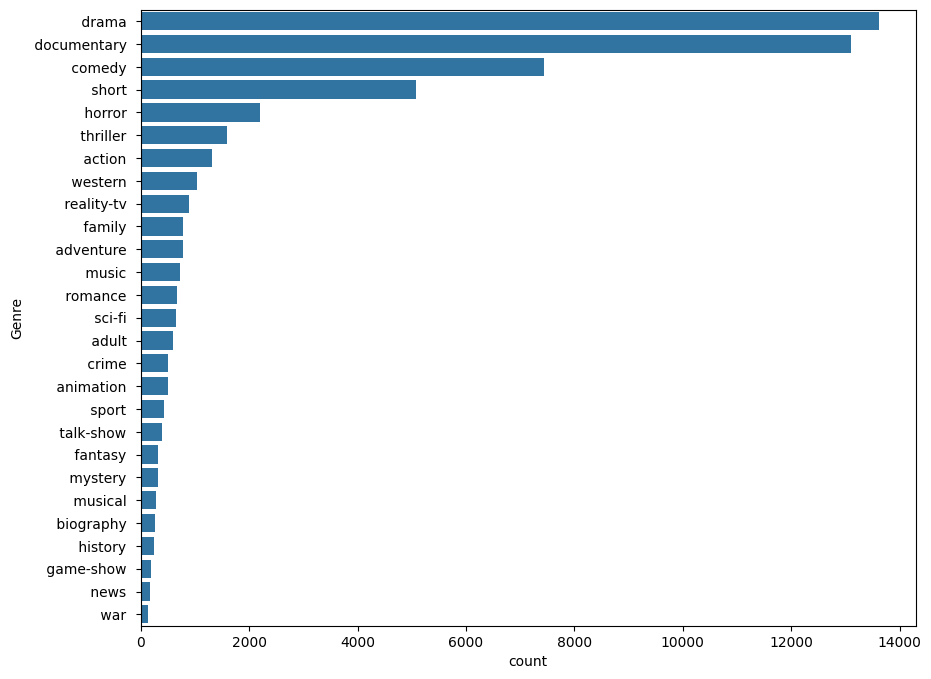

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(data=train_data, y='Genre', order=counts.index)

#### Ploting the distribution of Genres using a bar plot

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

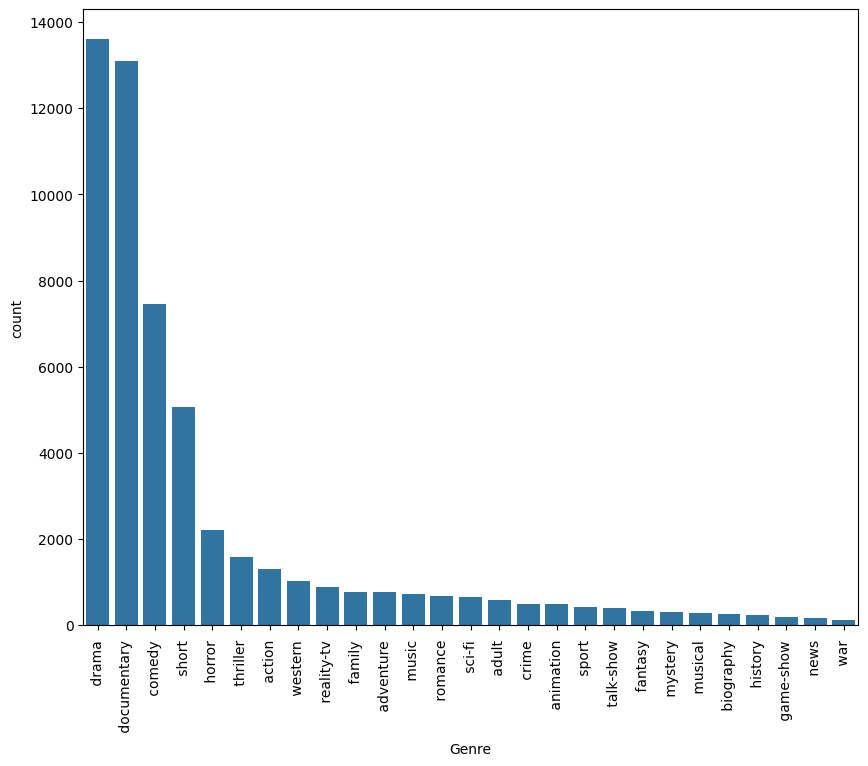

In [12]:
plt.figure(figsize = (10,8))
sns.barplot(x=counts.index, y=counts)
plt.xticks(rotation=90)

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def corpus(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

train_data['Corpus_cleaning'] = train_data['Description'].apply(corpus)
test_data['Corpus_cleaning'] = test_data['Description'].apply(corpus)

In [15]:
train_data

,Title,Genre,Description,Corpus_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [16]:
test_data

,id,Title,Description,Corpus_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


In [17]:
print("shape before drop nulls",train_data.shape)
train_data = train_data.drop_duplicates()
print("shape after drop nulls",train_data.shape)

shape before drop nulls (54214, 4)
shape after drop nulls (54214, 4)


In [18]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
train_data['length_Corpus_cleaning'] = train_data['Corpus_cleaning'].apply(len)

#### Visualizing the text length

Text(0, 0.5, 'Frequency')

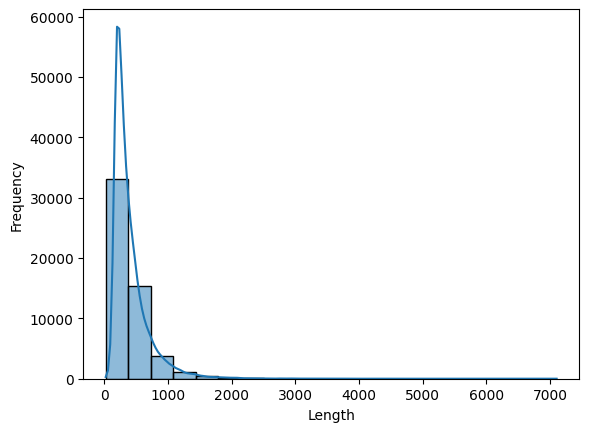

In [19]:
sns.histplot(data = train_data, x = train_data['length_Corpus_cleaning'], bins = 20, kde = True)
plt.xlabel('Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

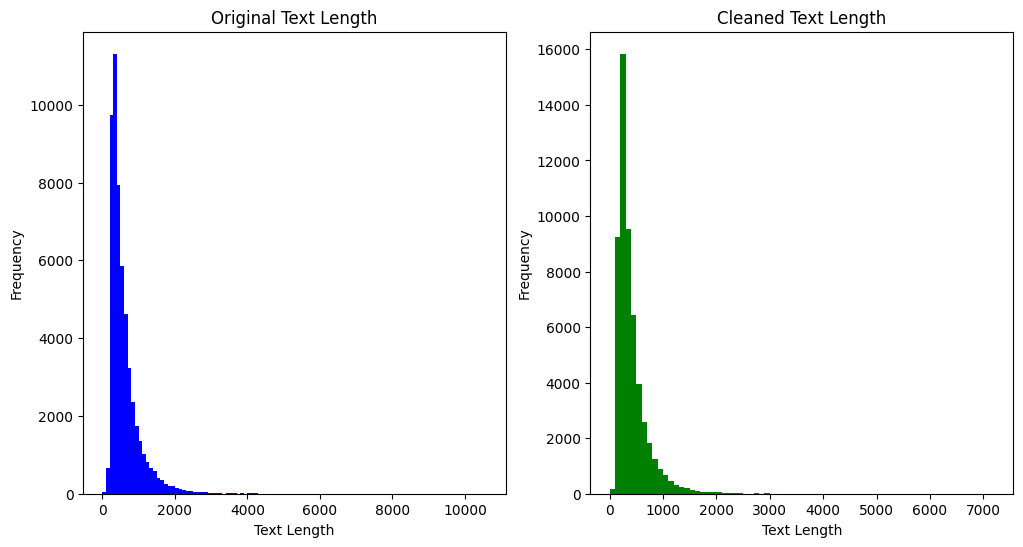

In [20]:
plt.figure(figsize=(12, 6))
# Subplot 1: Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = train_data['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color = 'blue')
plt.title('Original Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Subplot 2: Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = train_data['Corpus_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color = 'green')
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

### TF-IDF Text vectorization

In [21]:
%%time
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['Corpus_cleaning'])
X_test = tfidf.transform(test_data['Corpus_cleaning'])

CPU times: total: 9.66 s
Wall time: 17.4 s


In [22]:
X_train

<54214x124210 sparse matrix of type '<class 'numpy.float64'>'
	with 2640592 stored elements in Compressed Sparse Row format>

In [23]:
X_test

<54200x124210 sparse matrix of type '<class 'numpy.float64'>'
	with 2578617 stored elements in Compressed Sparse Row format>

In [24]:
train_data['Corpus_cleaning']

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: Corpus_cleaning, Length: 54214, dtype: object

In [25]:
X_train.shape

(54214, 124210)

In [26]:
X_test.shape

(54200, 124210)

In [27]:
X = X_train
y = train_data['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
X_train.shape

(43371, 124210)

In [29]:
y_train.shape

(43371,)

In [30]:
X_test.shape

(10843, 124210)

In [31]:
y_test.shape

(10843,)

### Multinomial Naive Bayes

In [32]:
%%time
import warnings
warnings.filterwarnings("ignore")

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

CPU times: total: 641 ms
Wall time: 1.17 s


MultinomialNB()

In [33]:
y_nb_pred = model_nb.predict(X_test)

In [34]:
y_nb_pred.shape

(10843,)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
accuracy_score(y_nb_pred, y_test)

0.44526422576777647

In [37]:
print(classification_report(y_nb_pred, y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.04      0.61      0.07        93
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.54      0.67      4462
       drama        0.88      0.38      0.53      6284
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

### Logistic Regression

In [38]:
%%time
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

CPU times: total: 2min 37s
Wall time: 4min 15s


LogisticRegression()

In [39]:
y_lr_pred = model_lr.predict(X_test)

In [40]:
y_lr_pred

array([' comedy ', ' drama ', ' documentary ', ..., ' drama ', ' short ',
       ' horror '], dtype=object)

In [41]:
accuracy_score(y_lr_pred, y_test)

0.5808355621138062

In [42]:
print(classification_report(y_lr_pred, y_test))

               precision    recall  f1-score   support

      action        0.22      0.56      0.32       103
       adult        0.21      0.82      0.33        28
   adventure        0.11      0.50      0.18        30
   animation        0.02      0.67      0.04         3
   biography        0.00      0.00      0.00         0
      comedy        0.59      0.53      0.56      1602
       crime        0.01      0.50      0.02         2
 documentary        0.86      0.65      0.74      3520
       drama        0.81      0.53      0.64      4108
      family        0.05      0.50      0.09        14
     fantasy        0.00      0.00      0.00         0
   game-show        0.35      0.93      0.51        15
     history        0.00      0.00      0.00         0
      horror        0.55      0.68      0.61       348
       music        0.38      0.69      0.49        78
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

### Support Vector CLasssifier

In [43]:
%%time
model_svc = SVC()
model_svc.fit(X_train, y_train)

CPU times: total: 49min 40s
Wall time: 2h 29min 23s


SVC()

In [44]:
y_svc_pred = model_svc.predict(X_test)

In [45]:
y_svc_pred

array([' drama ', ' drama ', ' comedy ', ..., ' drama ', ' drama ',
       ' horror '], dtype=object)

In [46]:
accuracy_score(y_svc_pred, y_test)

0.5691229364567002

In [47]:
print(classification_report(y_svc_pred, y_test))

               precision    recall  f1-score   support

      action        0.13      0.64      0.22        55
       adult        0.14      0.84      0.24        19
   adventure        0.09      0.52      0.15        23
   animation        0.01      1.00      0.02         1
   biography        0.00      0.00      0.00         0
      comedy        0.54      0.53      0.54      1472
       crime        0.00      0.00      0.00         0
 documentary        0.88      0.64      0.74      3692
       drama        0.84      0.50      0.62      4578
      family        0.05      0.73      0.10        11
     fantasy        0.00      0.00      0.00         0
   game-show        0.33      1.00      0.49        13
     history        0.00      0.00      0.00         0
      horror        0.52      0.72      0.60       310
       music        0.25      0.77      0.38        47
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

### Comparision

In [48]:
acs_nb = accuracy_score(y_nb_pred, y_test)
acs_lr = accuracy_score(y_lr_pred, y_test)
acs_svc = accuracy_score(y_svc_pred, y_test)

In [49]:
total = acs_nb + acs_lr + acs_svc
# total = acs_nb + acs_lr
pie_part_1 = acs_nb/total
pie_part_2 = acs_lr/total
pie_part_3 = acs_svc/total

In [50]:
labels = ['Multinomial Naive Bayes', 'Logistic Regression', 'Support Vector Classifier']
sizes = [pie_part_1, pie_part_2, pie_part_3]
# labels = ['Multinomial Naive Bayes', 'Logistic Regression']
# sizes = [pie_part_1, pie_part_2]

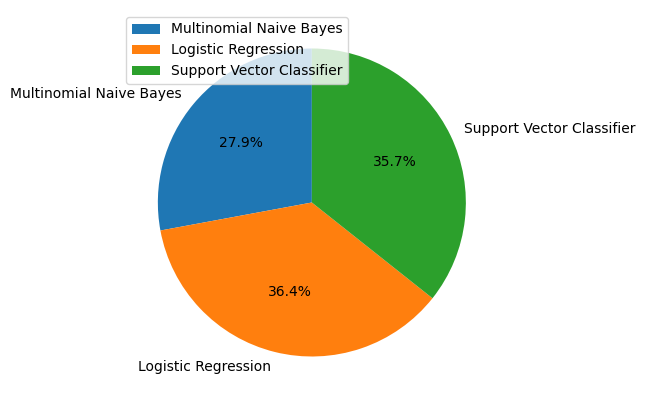

In [51]:
plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(labels, loc=2)

### Adding the predicted values to a new dataframe with the target genre

In [52]:
test_data = test_data[:10843]
test_data['Predicted_Genre_nb'] = y_nb_pred

In [53]:
test_data = test_data[:10843]
test_data['Predicted_Genre_lr'] = y_lr_pred

In [54]:
test_data = test_data[:10843]
test_data['Predicted_Genre_svm'] = y_svc_pred

In [55]:
test_data.to_csv('predicted_genres.csv', index=False)

# Add actual genre column to predicted dataFrame
extracted_col = test_soln_data["Target_Genre"]
test_data.insert(7, "Target_Genre", extracted_col)

In [56]:
test_data.head()

,id,Title,Description,Corpus_cleaning,Predicted_Genre_nb,Predicted_Genre_lr,Predicted_Genre_svm,Target_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama,comedy,drama,NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama,drama,drama,thriller
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,drama,documentary,comedy,comedy
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,documentary,horror,horror,documentary
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,documentary,music,music,drama


In [57]:
correctly_predicted_values_nb = (test_data['Predicted_Genre_nb'] == test_data['Target_Genre']).sum()
correctly_predicted_values_lr = (test_data['Predicted_Genre_lr'] == test_data['Target_Genre']).sum()
correctly_predicted_values_svm = (test_data['Predicted_Genre_svm'] == test_data['Target_Genre']).sum()

print("Number of samples Correctly predicted by Multinomial Naive Bayes Classifier:", correctly_predicted_values_nb)
print("Number of samples Correctly predicted by Logistic Regression:", correctly_predicted_values_lr)
print("Number of samples Correctly predicted by Support Vector Classifier:", correctly_predicted_values_svm)

Number of samples Correctly predicted by Multinomial Naive Bayes Classifier: 2718
Number of samples Correctly predicted by Logistic Regression: 2143
Number of samples Correctly predicted by Support Vector Classifier: 2298


### Creating the pkl file to predict the user input

In [58]:
import pickle
with open('tfidf.pkl', 'wb') as file:
    pickle.dump(tfidf, file)
with open('model_lr.pkl', 'wb') as file:
    pickle.dump(model_lr, file)

print("Models pickled successfully.")

Models pickled successfully.


#### Sample text data

In [59]:
# title = "Edgar's Lunch (1998)"
# discription = "L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."

In [62]:
title = input("Enter movie Title")
discription = input("Enter movie Discription")

In [63]:
new_data = [title, discription]

In [64]:
new_data_transformed = tfidf.transform(new_data)

In [65]:
predictions = model_nb.predict(new_data_transformed)

In [66]:
for text, prediction in zip(new_data, predictions):
    print(f"Text: Predicted Genre: {prediction}")

Text: Predicted Genre:  drama 
Text: Predicted Genre:  drama 
